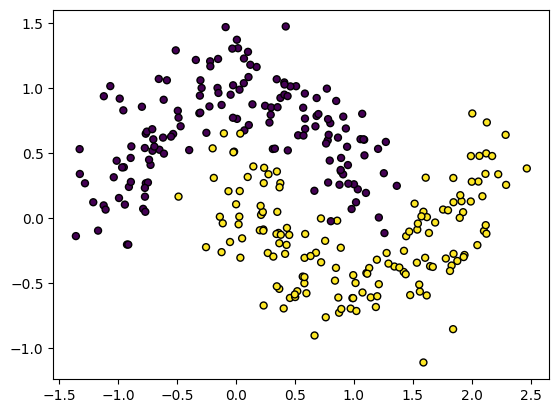

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X1, Y1 = make_moons(n_samples=300, noise=0.2)
plt.scatter(X1[:, 0], X1[:, 1], marker='o',
 c=Y1, s=25, edgecolor='k')

In [2]:
import torch
from torch import nn

input_size = 2
hidden_size = 8
output_size = 1

net = nn.Sequential(nn.Linear(in_features=input_size, out_features=hidden_size),
                    nn.ReLU(),
                    nn.Linear(in_features=hidden_size, out_features=output_size))
print(net)

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)


In [5]:
print(X1.shape)
tensor = torch.from_numpy(X1).float()
pred   = net(tensor)
print(pred.size())

(300, 2)
torch.Size([300, 1])


In [8]:
class MyNN(nn.Module):

  def __init__(self, input_size, hidden_size, output_size):
    super(MyNN, self).__init__()

    self.hidden = nn.Linear(input_size, hidden_size)
    self.relu   = nn.ReLU()
    self.output = nn.Linear(hidden_size, output_size)

  def forward(self, X):

    hidden = self.relu(self.hidden(X))
    output = self.output(hidden)

    return output

In [9]:
input_size = 2
hidden_size = 8
output_size = 1

net = MyNN(input_size,hidden_size, output_size)
print(net)

MyNN(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)


In [10]:
print(X1.shape)
tensor = torch.from_numpy(X1).float()
pred   = net(tensor)
print(pred.size())

(300, 2)
torch.Size([300, 1])


In [11]:
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

print(device)

cuda


In [12]:
input_size = 2
hidden_size = 8
output_size = 1

net = MyNN(input_size,hidden_size, output_size)
net = net.to(device)
print(net)

MyNN(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)


In [13]:
print(X1.shape)
tensor = torch.from_numpy(X1).float()
tensor = tensor.to(device)
pred   = net(tensor)
print(pred.size())

(300, 2)
torch.Size([300, 1])
